In [176]:
import mglearn
import numpy as np
import pandas as pd

In [177]:
# conda install graphviz 입력하고
# 환경변수 -> 시스템 환경변수 -> path -> 편집에서 
# C:\Users\user\anaconda3\Library\bin\graphviz 입력

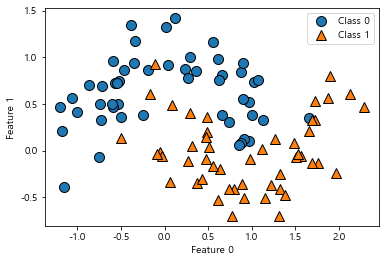

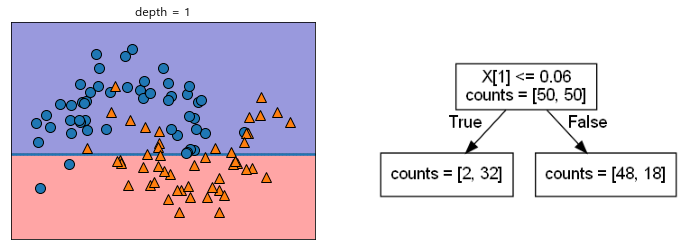

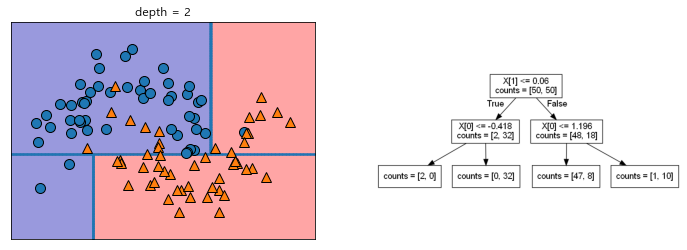

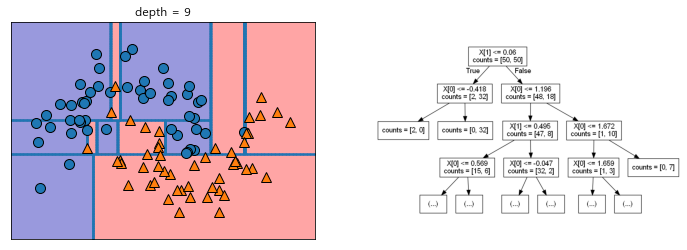

In [178]:
mglearn.plots.plot_tree_progressive()

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [180]:
cancer = load_breast_cancer()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

In [182]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [183]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


In [184]:
model = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [185]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9929577464788732
0.9020979020979021


In [186]:
model = DecisionTreeClassifier(max_leaf_nodes = 5, max_depth = 4, random_state = 0)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


In [187]:
from sklearn.tree import export_graphviz
import graphviz

In [188]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [189]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

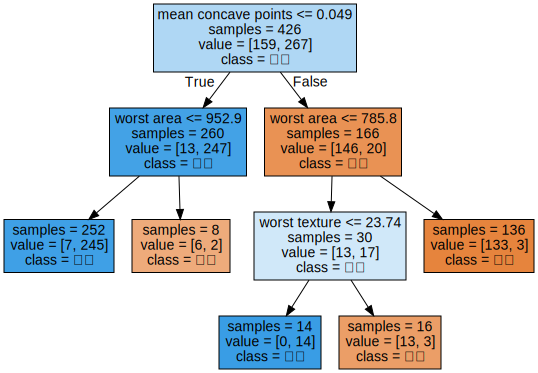

In [190]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [191]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.81084146, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05733052, 0.        , 0.13182801, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [192]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<BarContainer object of 30 artists>

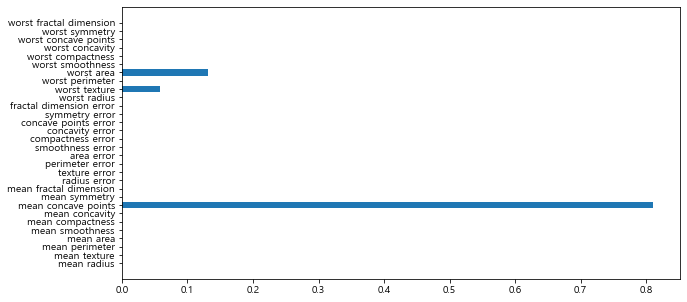

In [193]:
plt.figure(figsize=(10, 5)) 
plt.barh(cancer["feature_names"], model.feature_importances_,)

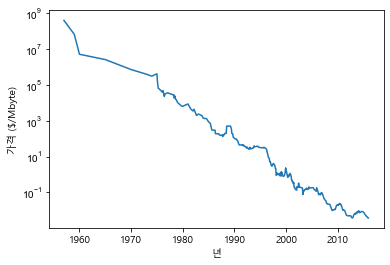

In [194]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [196]:
train = ram_prices[ram_prices["date"] < 2000]
test = ram_prices[ram_prices["date"] >= 2000]

In [197]:
X_train = train.date.to_numpy()[:, np.newaxis]
y_train = train["price"]

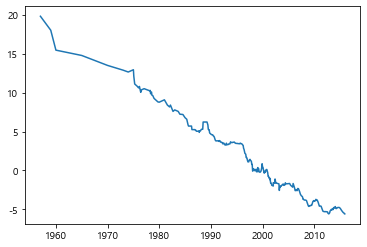

In [198]:
plt.plot(ram_prices["date"], ram_prices["price"].apply(lambda x : np.log(x)))

In [199]:
train["price"].apply(lambda x: np.log(x))

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
         ...    
197    -0.248461
198    -0.139262
199     0.039221
200     0.292670
201     0.854415
Name: price, Length: 202, dtype: float64

In [200]:
X_train = train["date"].to_numpy()[:, np.newaxis]
y_train = train["price"].apply(lambda x: np.log(x))

In [201]:
train

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
197,197,1999.50,7.800000e-01
198,198,1999.67,8.700000e-01
199,199,1999.75,1.040000e+00
200,200,1999.83,1.340000e+00


In [202]:
tree_model = DecisionTreeRegressor()
linear_model = LinearRegression()

tree_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)


LinearRegression()

In [203]:
X = ram_prices["date"].to_numpy()[:, np.newaxis]
y = ram_prices["price"].apply(lambda x : np.log(x))


In [204]:
pred_tree = tree_model.predict(X)
pred_linear = linear_model.predict(X)

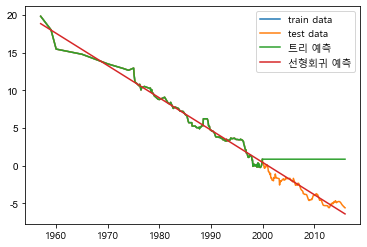

In [205]:
X_test = ram_prices["date"].to_numpy()[:, np.newaxis]
y_test = ram_prices["price"].apply(lambda x : np.log(x))

plt.yticks(fontname = "Arial")
plt.plot(X_train, y_train, label = "train data")
plt.plot(X_test, y_test, label = "test data")
plt.plot(X, pred_tree, label = "트리 예측")
plt.plot(X, pred_linear, label = "선형회귀 예측")
plt.legend()
plt.show()

In [251]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [208]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [209]:
df["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [210]:
len(df["cap-shape"].unique())

6

In [211]:
df["cap-color"].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

In [216]:
for i in df.columns:
    df[i].unique()
    for j in range(len(df[i].unique())):
        print(df[i].replace(df[i].unique()[j], j, inplace=True))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [229]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [234]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = le.fit_transform(df["cap-shape"])
print(df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [252]:
def encode(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [253]:
for i in df.columns:
    df[i] = encode(df[i])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [254]:
df.corrwith(df["class"])

class                       1.000000
cap-shape                  -0.112110
cap-surface                 0.169663
cap-color                  -0.042028
bruises                    -0.501530
odor                       -0.582015
gill-attachment             0.129200
gill-spacing                0.348387
gill-size                   0.540024
gill-color                 -0.412869
stalk-shape                 0.102019
stalk-root                 -0.337542
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
stalk-color-above-ring     -0.225294
stalk-color-below-ring     -0.098476
veil-type                        NaN
veil-color                  0.120766
ring-number                 0.152261
ring-type                  -0.556515
spore-print-color          -0.560715
population                 -0.155254
habitat                    -0.191297
dtype: float64

In [255]:
df.corrwith(df["class"]).sort_values()

odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
stalk-root                 -0.337542
stalk-color-above-ring     -0.225294
habitat                    -0.191297
population                 -0.155254
cap-shape                  -0.112110
stalk-color-below-ring     -0.098476
cap-color                  -0.042028
stalk-shape                 0.102019
veil-color                  0.120766
gill-attachment             0.129200
ring-number                 0.152261
cap-surface                 0.169663
gill-spacing                0.348387
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
dtype: float64

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [257]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [258]:
from sklearn.tree import export_graphviz


export_graphviz(model, out_file='mushroom_tree.dot',
                class_names = ['독','식용'],
                feature_names = X.columns,
                impurity = True,
                filled = True)

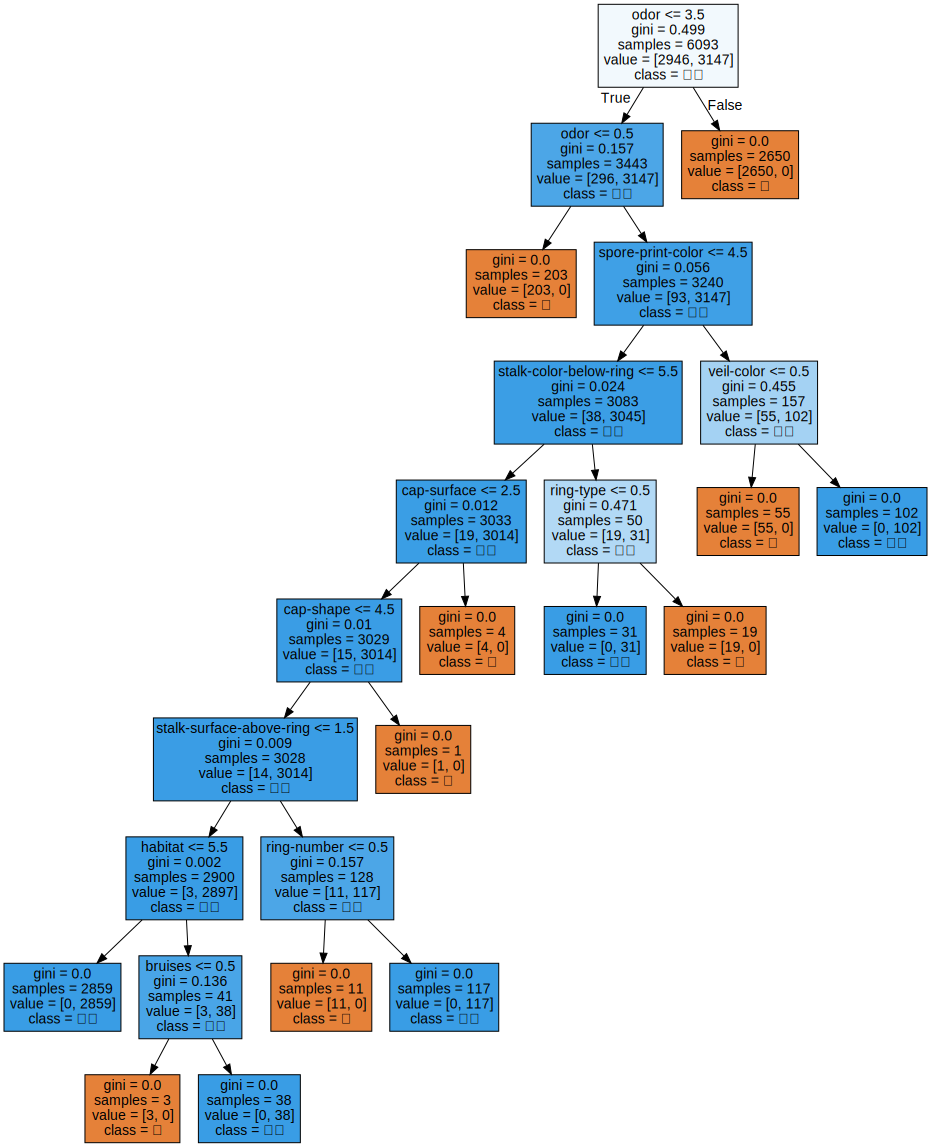

In [259]:
import graphviz

with open('mushroom_tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

<BarContainer object of 22 artists>

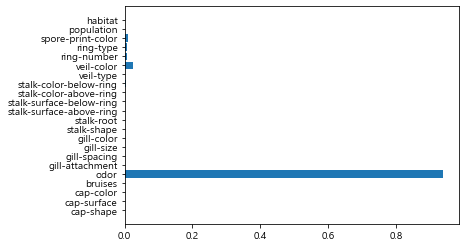

In [260]:
xlabel = X.columns
plt.barh(X.columns, model.feature_importances_)